\setlength{\parindent}{0pt}  

**Christopher Wilbar**  
**MSDS_422-DL_SEC55**  
**Assignment 2: Evaluating Classification Models**

## 1. Summary and Problem Definition  

**Problem Definition:** 
I seek to determine the best machine learning model between Logistic Regression and Navie Bayes Bernoulli to determine which customers a bank should target with marketing to invest in lond term deposits. I also uncover what characteristics the customers have for if they have defaulted, have housing, and/or have a loan.

    
**Summary**:
The bank wants its clients to invest in term deposits.  A term deposit is aninvestment such as a certificate of deposit.  The interest rate and durationof the deposit are set in advance. A term deposit is distinct from a demanddeposit.The bank is interested in identifying factors that affect client responses to new  term  deposit  offerings,  which  are  the  focus  of  the  marketing  campaigns. In this analysis we seek to answer  What  kinds  of  clients  are  most  likely  to  subscribe  to  new  termdeposits?   What marketing approaches are most effective in encouragingclients to subscribe?

## 2. Results and Recommendations

**Results and Recomendations**  
The two models are almost identical, with Naive-Bayes working slightly better using the AUC score as a metric along with the Recall rate. The Naive-bayes will scale better, but is less intuitive than than the logistic model so both can be used. Both models perforrmed as well on the test and train data and do not suffer from over-fitting. Although much more analysis could be done, initial findings suggest targeting customers that do not already have a housing or a personal finance loan as they are more likely to repond yes.

## 3. Research Design and Methods Used

**Research Design**

A Portuguese bank conducted seventeen telephone marketing campaignsbetween May 2008 and November 2010.  The bank recorded client contactinformation for each telephone call. 

**Methods Used**  
Pyhton v.3 Jupyter Notebook was created to perform the analysis.
The following packages were used:
pandas, numpy, matplotlip.pyplot, seaborn  
  
Basic pyhton descriptive statisitcs were generated. 

Sci-kit learn was the primary tool for analysis to perfrom Logistic Regression and Naive Bayes models and perform standard classification model comparison techniques.

## 4. Programming Work

### 4.1 | **Initial Setup**

In [1]:
# First we set our seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# Import base packages into the namespace for this program
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from sklearn.model_selection import train_test_split # Create train/test set
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.model_selection import cross_val_predict # Predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve # Precision/Recall Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB

In [2]:
#We next Define any functions that will be needed
#ROC Curve Plot
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
#Precision vs. Recall Plot

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

#Precision and Recall as function of Threshold Plot
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])


In [3]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [4]:
# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


### 4.2 | **Initial Data Exploration**

In [5]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [6]:
# look at the beginning of the DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#Simple descriptive statistics for numerical variables
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000



Frequency table for response -----
 no     4000
yes     521
Name: response, dtype: int64

Frequency table for job -----
 management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64


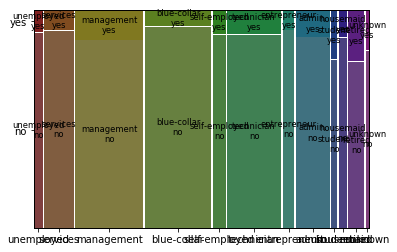


Frequency table for marital status -----
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64


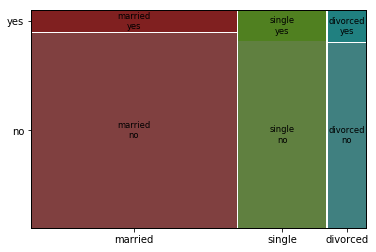


Frequency table for education -----
 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


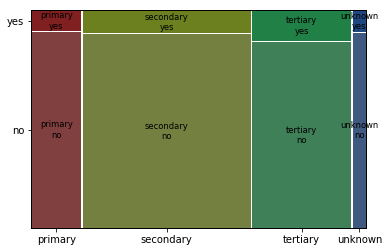


Frequency table for default -----
 no     4445
yes      76
Name: default, dtype: int64


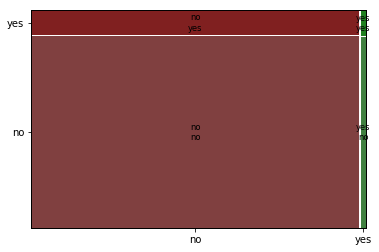


Frequency table for housing -----
 yes    2559
no     1962
Name: housing, dtype: int64


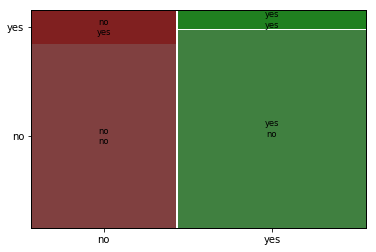


Frequency table for loan -----
 no     3830
yes     691
Name: loan, dtype: int64


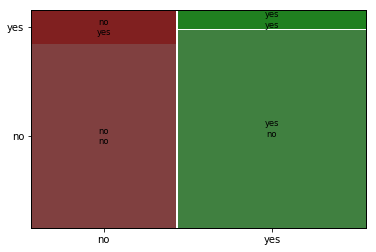


Frequency table for campaign -----
 1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
28       3
24       3
20       3
19       3
21       2
23       2
22       2
32       2
29       1
44       1
30       1
50       1
31       1
Name: campaign, dtype: int64


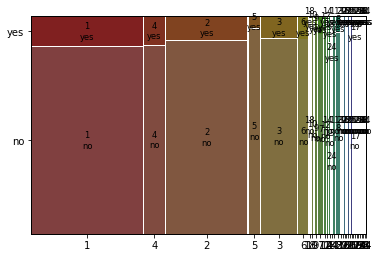


Frequency table for contact -----
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


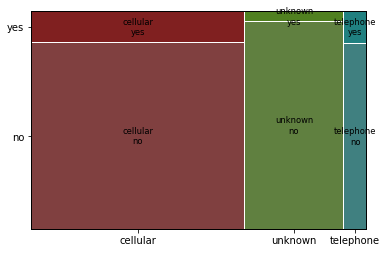

In [8]:
#Display frequency tables and mosaics for non-numeric variables
print('\nFrequency table for response -----\n', bank.response.value_counts())

print('\nFrequency table for job -----\n', bank.job.value_counts())
mosaic(bank,['job','response'])
plt.show()

print('\nFrequency table for marital status -----\n', bank.marital.value_counts())
mosaic(bank,['marital','response'])
plt.show()

print('\nFrequency table for education -----\n', bank.education.value_counts())
mosaic(bank,['education','response'])
plt.show()

print('\nFrequency table for default -----\n', bank.default.value_counts())
mosaic(bank,['default','response'])
plt.show()

print('\nFrequency table for housing -----\n', bank.housing.value_counts())
mosaic(bank,['housing','response'])
plt.show()

print('\nFrequency table for loan -----\n', bank.loan.value_counts())
mosaic(bank,['housing','response'])
plt.show()

print('\nFrequency table for campaign -----\n', bank.campaign.value_counts())
mosaic(bank,['campaign','response'])
plt.show()

print('\nFrequency table for contact -----\n', bank.contact.value_counts())
mosaic(bank,['contact','response'])
plt.show()



In [9]:
# We need to map the categorical variables to numerical values to use the Machine Learning Models

#We need to separate job in to separate groups and assign numerical value
#0 = 

# Replace all 'no' with 0 and 'yes' with '1'
bank.replace('no',0,inplace=True)
bank.replace('yes',1,inplace=True)

#mapping function to convert marital status in to not married (single/divorced)/married to integer 0/1
convert_to_binary2 = {'single' : 0, 'divorced' : 0, 'married' : 1}
bank['marital'] = bank['marital'].map(convert_to_binary2)

In [10]:
#We want to set aside a random 20% of the data to avoid snooping bias and allow for model validation/testing.

bank_train, bank_test = train_test_split(bank, test_size=0.2)

print('Train set shape: ',bank_train.shape)
print('Test set shape: ',bank_test.shape)

Train set shape:  (3616, 17)
Test set shape:  (905, 17)


In [11]:
bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
1209,58,retired,0,secondary,0,1640,0,1,cellular,4,feb,72,6,274,4,failure,0
3993,44,management,1,tertiary,0,17361,0,0,unknown,18,jun,476,1,-1,0,unknown,0
4389,34,management,1,tertiary,0,436,0,1,cellular,28,jul,118,4,-1,0,unknown,0
2540,31,management,1,tertiary,0,4148,1,0,cellular,21,nov,316,3,99,9,other,1
4514,38,blue-collar,1,secondary,0,1205,1,0,cellular,20,apr,45,4,153,1,failure,0


In [12]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(bank_train['default']), np.array(bank_train['housing']), np.array(bank_train['loan']), 
    np.array(bank_train['response'])]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)


(3616, 4)



Default value counts ---
[[   0 3551]
 [   1   65]]

Housing value counts ---
[[   0 1571]
 [   1 2045]]

Loan value counts ---
[[   0 3052]
 [   1  564]]

Response value counts ---
[[   0 3198]
 [   1  418]]


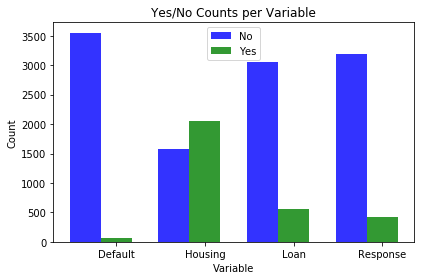

In [13]:
#Display value counts and plot histograms of the three explanotry variables and response variable

#Default
uniquedefault, countsdefault = np.unique(model_data[:,0], return_counts=True)
print('\nDefault value counts ---')
print (np.asarray((uniquedefault, countsdefault)).T)
#histdefault = 

#Housing
uniquehousing, countshousing = np.unique(model_data[:,1], return_counts=True)
print('\nHousing value counts ---')
print (np.asarray((uniquehousing, countshousing)).T)

#Loan
uniqueloan, countsloan = np.unique(model_data[:,2], return_counts=True)
print('\nLoan value counts ---')
print (np.asarray((uniqueloan, countsloan)).T)

#Response
uniqueresponse, countsresponse = np.unique(model_data[:,3], return_counts=True)
print('\nResponse value counts ---')
print (np.asarray((uniqueresponse, countsresponse)).T)

# data to plot
n_groups = 4
counts_no = (countsdefault[0], countshousing[0], countsloan[0], countsresponse[0])
counts_yes = (countsdefault[1], countshousing[1], countsloan[1], countsresponse[1])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, counts_no, bar_width,
alpha=opacity,
color='b',
label='No')
 
rects2 = plt.bar(index + bar_width, counts_yes, bar_width,
alpha=opacity,
color='g',
label='Yes')
 
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Yes/No Counts per Variable')
plt.xticks(index + bar_width, ('Default', 'Housing', 'Loan', 'Response'))
plt.legend()
 
plt.tight_layout()
plt.show()


0    410
1      8
Name: default, dtype: int64 

0    242
1    176
Name: housing, dtype: int64 

0    387
1     31
Name: loan, dtype: int64 



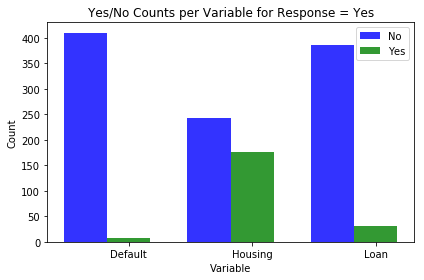

In [14]:
#View Distribution of explanatory variables where the Response is yes

bank_train_yes = bank_train[bank_train['response']==1]

#Print counts
print(bank_train_yes['default'].value_counts(),'\n')
print(bank_train_yes['housing'].value_counts(), '\n')
print(bank_train_yes['loan'].value_counts(), '\n')

# Data to plot
n_groups = 3
counts_no = (bank_train_yes['default'].value_counts()[0], bank_train_yes['housing'].value_counts()[0], bank_train_yes['loan'].value_counts()[0])
counts_yes = (bank_train_yes['default'].value_counts()[1], bank_train_yes['housing'].value_counts()[1], bank_train_yes['loan'].value_counts()[1])
 
# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, counts_no, bar_width,
alpha=opacity,
color='b',
label='No')
 
rects2 = plt.bar(index + bar_width, counts_yes, bar_width,
alpha=opacity,
color='g',
label='Yes')
 
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Yes/No Counts per Variable for Response = Yes')
plt.xticks(index + bar_width, ('Default', 'Housing', 'Loan'))
plt.legend()
 
plt.tight_layout()
plt.show()

Of interest, Default and Loan distribution is similar to general population, but the housing distribution actually flips to more "No" than "Yes".

In [15]:
#To get an idea of how our models are doing, we see the actual value for a row with a response of yes

model_data_response_yes_index = np.where(model_data[:,3]==1)[0]
row_check = model_data_response_yes_index[4]
data_check = model_data[row_check,0:3]
print('Test entry we will use where response is one index: ', row_check)
print('\nTest entry values: ', model_data[row_check,:])

Test entry we will use where response is one index:  94

Test entry values:  [1 1 0 1]


### 4.3 | **Model Selection**

#### 4.3a | Logistic Regression

In [16]:
# We first explore a logistic regression model
log_reg = LogisticRegression()

#Define our three explanatory variables we are exploring as X, and our response variable as Y
X_train = model_data[:,0:3]
y_train = model_data[:,3]

#Define our logistic regression varaibles
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Check on single test point
print('Input Data: = ',model_data[row_check,0:3])
print('Actual Data: response = ',model_data[row_check,3])
print('Logistic Regrssion Model Predicition: response = ', log_reg.predict([data_check]))

#Model fails to correctly classify this data. Further analysis needed to check overall accuracy

Input Data: =  [1 1 0]
Actual Data: response =  1
Logistic Regrssion Model Predicition: response =  [0]


In [18]:
#Check model accuracy
cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.88391376, 0.8846473 , 0.8846473 ])

In [19]:
#Accuracy doesn't tell the whole picture, especially since the yes response is rare. Need better metrics
#Confusion Matrix

#Need set of predictions to compare to actual responses
y_train_predictions = cross_val_predict(log_reg,X_train,y_train,cv=3)

#Create confusion Matrix
confusion_matrix(y_train, y_train_predictions)


array([[3198,    0],
       [ 418,    0]], dtype=int64)

This model is useless with te default threshold of 0.5 because it classifies everything as no. Need to adjust the treshold in making predicitons.

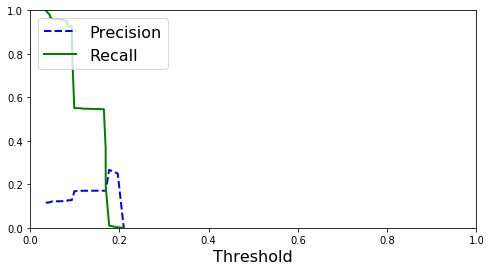

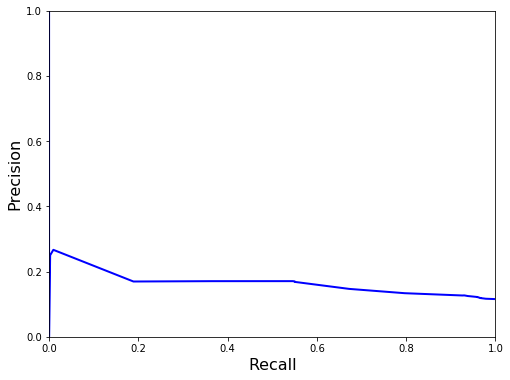

In [20]:
#We build a Precision-Recall Curve to get an idea of what is going on. It shows that these are only defined for a value lower
#than 0.2, with no value resulting in very high precision.

#Need to use threshold scores to evaluate precision, recall, and ROC.
#We will calculate the score using the positive classe's probability as the score

y_scores_log = cross_val_predict(log_reg, X_train, y_train, cv=3,method='predict_proba')[:,1]

#We then cacluate the precision and recall across all possible thresholds
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train, y_scores_log)

#First we plot Precision and Recall as Functions of the Threshold
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_log, recalls_log, thresholds_log)
plt.xlim([0, 1])
plt.show()

#And we plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_log, recalls_log)
plt.show()

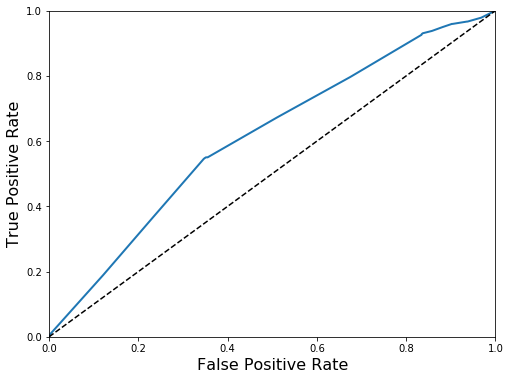

In [21]:
#We also plot the ROC curve to get an idea of the best we can do

#First we compute TPR and FPR for various threshold values

fpr_log, tpr_log, thresholds_log = roc_curve(y_train,y_scores_log)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_log, tpr_log)
plt.show()

In [22]:
# Need to create predictions based on a different threshold. Since we are using AUC to evalaute the models,
# we want to find the threshold that maximizes this value.

#To find best threshold we use this code to create a list of the AUC across the various thresholds from the ROC curve:
roc_auc_log_ls = []
for thres in thresholds_log:
    y_pred_new_thresholds = np.where(y_scores_log>thres,1,0)
    roc_auc_log_ls.append(roc_auc_score(y_train,y_pred_new_thresholds))
    
print(roc_auc_log_ls)

#We then find the threshold with the max ROC AUC
max_auc_log = np.max(roc_auc_log_ls) 
best_threshold_log = thresholds_log[np.argmax(roc_auc_log_ls)]

print('\nThe best threshold to maximize ROC (to 4 digits) AUC is: ', round(best_threshold_log,4),
     '\nWith an AUC of : ',round(max_auc_log,4))


[0.5, 0.5, 0.4996873045653533, 0.5007271290968339, 0.5030648641046588, 0.5339910410513748, 0.5662772187162431, 0.5994940019330262, 0.5995957401605668, 0.5993847829534608, 0.5979776534975508, 0.5975086103455809, 0.5809649272422058, 0.5609269848679348, 0.5457829504684447, 0.5466664272826018, 0.5467681655101424, 0.5400377329132143, 0.5339798199233372, 0.5284455595752129, 0.527976516423243, 0.5276638209885963, 0.5151485228507051, 0.5145231319814119, 0.505181916927745]

The best threshold to maximize ROC (to 4 digits) AUC is:  0.1096 
With an AUC of :  0.5996


In [23]:
#Finally we, re-evalute the confusion Matrix and also calculate the Precision, Recall, AUC Score, and F1 Score
#Using the threshold calculated above to get the predicted values for the training set

y_train_pred_best_threshold_log = (y_scores_log > best_threshold_log)

log_confusionmatrix = confusion_matrix(y_train, y_train_pred_best_threshold_log)
log_precision = precision_score(y_train, y_train_pred_best_threshold_log)
log_recall = recall_score(y_train, y_train_pred_best_threshold_log)
log_f1 = f1_score(y_train, y_train_pred_best_threshold_log) 
log_auc = roc_auc_score(y_train, y_train_pred_best_threshold_log )

print('Confusion Matrix :\n', log_confusionmatrix)
print('Precision score : ',round(log_precision,4))
print('Recall score: ', round(log_recall,4))
print('F1 score: ', round(log_f1,4))
print('ROC AUC score: ', round(log_auc,4))

Confusion Matrix :
 [[2083 1115]
 [ 189  229]]
Precision score :  0.1704
Recall score:  0.5478
F1 score:  0.2599
ROC AUC score:  0.5996


### 4.3b | Naive Bayes

In [24]:
# We now explore a Bernoulli Naive Bayes model
nb_bern = BernoulliNB()

#Define our three explanatory variables we are exploring as X, and our response variable as Y
X_train = model_data[:,0:3]
y_train = model_data[:,3]

#Define our logistic regression varaibles
nb_bern.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
#Check on single test point
print('Input Data: = ',model_data[row_check,0:3])
print('Actual Data: response = ',model_data[row_check,3])
print('Logistic Regrssion Model Predicition: response = ', nb_bern.predict([data_check]))

#Model fails to correctly classify this data. Further analysis needed to check overall accuracy

Input Data: =  [1 1 0]
Actual Data: response =  1
Logistic Regrssion Model Predicition: response =  [0]


In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(nb_bern, X_train, y_train, cv=3, scoring="accuracy")

array([0.88391376, 0.8846473 , 0.8846473 ])

In [27]:
#Accuracy doesn't tell the whole picture, especially since the yes response is rare. Need better metrics
#Confusion Matrix

from sklearn.model_selection import cross_val_predict

#Need set of predictions to compare to actual responses
y_train_predictions = cross_val_predict(nb_bern,X_train,y_train,cv=3)

from sklearn.metrics import confusion_matrix

#Create confusion Matrix
confusion_matrix(y_train, y_train_predictions)


array([[3198,    0],
       [ 418,    0]], dtype=int64)

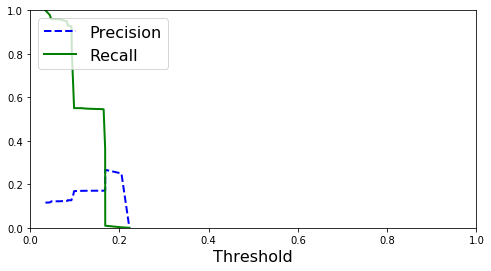

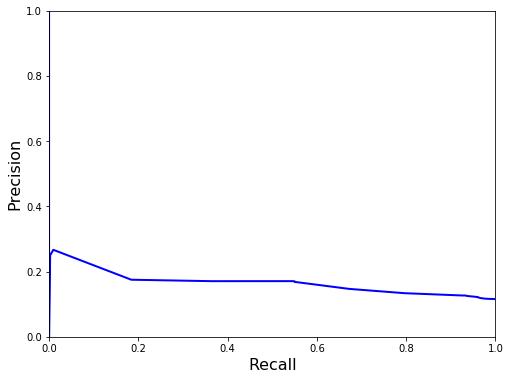

In [28]:
#We have the same problem as with the nbistic model and the threshold is too high

#We build a Precision-Recall Curve to get an idea of what is going on. It shows that these are only defined for a value lower
#than 0.2, with no value resulting in very high precision.

#Need to use threshold scores to evaluate precision, recall, and ROC.
#We will calculate the score using the positive classe's probability as the score

y_scores_nb = cross_val_predict(nb_bern, X_train, y_train, cv=3,method='predict_proba')[:,1]

#We then cacluate the precision and recall across all possible thresholds
precisions_nb, recalls_nb, thresholds_nb = precision_recall_curve(y_train, y_scores_nb)

#First we plot Precision and Recall as Functions of the Threshold
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_nb, recalls_nb, thresholds_nb)
plt.xlim([0, 1])
plt.show()

#And we plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_nb, recalls_nb)
plt.show()

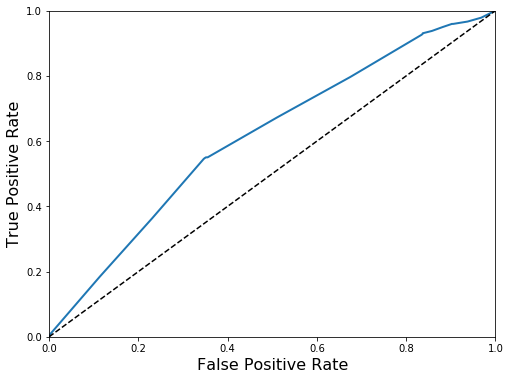

In [29]:
#We also plot the ROC curve to get an idea of the best we can do

#First we ompute TPR and FPR for various threshold values

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train,y_scores_nb)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_nb, tpr_nb)
plt.show()

In [30]:
# Need to create predictions based on a different threshold. Since we are using AUC to evalaute the models,
# we want to find the threshold that maximizes this value.

#To find best threshold we use this code to create a list of the AUC across the various thresholds from the ROC curve:
roc_auc_nb_ls = []
for thres in thresholds_nb:
    y_pred_new_thresholds = np.where(y_scores_nb>thres,1,0)
    roc_auc_nb_ls.append(roc_auc_score(y_train,y_pred_new_thresholds))
    
print(roc_auc_nb_ls)

#We then find the threshold with the max ROC AUC
max_auc_nb = np.max(roc_auc_nb_ls) 
best_threshold_nb = thresholds_nb[np.argmax(roc_auc_nb_ls)]

print('\nThe best threshold to maximize ROC (to 4 digits) AUC is: ', round(best_threshold_nb,4),
     '\nWith an AUC of : ',round(max_auc_nb,4))


[0.5, 0.5, 0.4996873045653533, 0.5007271290968339, 0.5030648641046588, 0.535351041769527, 0.5662772187162431, 0.5994940019330262, 0.5995957401605668, 0.5993847829534608, 0.5989157398014908, 0.5975086103455809, 0.5809649272422058, 0.5609269848679348, 0.5457829504684447, 0.5458846886959852, 0.5467681655101424, 0.5400377329132143, 0.5339798199233372, 0.5284455595752129, 0.527976516423243, 0.5273511255539497, 0.527038430119303, 0.5145231319814119, 0.505181916927745]

The best threshold to maximize ROC (to 4 digits) AUC is:  0.1149 
With an AUC of :  0.5996


In [31]:
#Finally we, re-evalute the confusion Matrix and also calculate the Precision, Recall, AUC Score, and F1 Score
#Using the threshold calculated above to get the predicted values for the training set

y_train_pred_best_threshold_nb = (y_scores_nb > best_threshold_nb)


nb_confusionmatrix = confusion_matrix(y_train, y_train_pred_best_threshold_nb)
nb_precision = precision_score(y_train, y_train_pred_best_threshold_nb)
nb_recall = recall_score(y_train, y_train_pred_best_threshold_nb)
nb_f1 = f1_score(y_train, y_train_pred_best_threshold_nb) 
nb_auc = roc_auc_score(y_train, y_train_pred_best_threshold_nb )

print('Confusion Matrix :\n', nb_confusionmatrix)
print('Precision score : ',round(nb_precision,4))
print('Recall score: ', round(nb_recall,4))
print('F1 score: ', round(nb_f1,4))
print('ROC AUC score: ', round(nb_auc,4))

Confusion Matrix :
 [[2083 1115]
 [ 189  229]]
Precision score :  0.1704
Recall score:  0.5478
F1 score:  0.2599
ROC AUC score:  0.5996


### 4.3c | Comparison and Selection

In [32]:
comparisondata = [
    ['Logistic_Regression_Model',log_auc, log_confusionmatrix[0,0], log_confusionmatrix[0,1], log_confusionmatrix[1,0], 
    log_confusionmatrix[1,1], log_precision, log_recall, log_f1],
     ['Naive_Bayes_Bernoulli_Model',nb_auc, nb_confusionmatrix[0,0], nb_confusionmatrix[0,1], nb_confusionmatrix[1,0], 
    nb_confusionmatrix[1,1], nb_precision, nb_recall, nb_f1]]

comparisondf = pd.DataFrame(comparisondata, columns=['Model Type','ROC_AUC_SCORE','TNR','FPR','FNR','TPR','PRECISION_SCORE','RECALL_SCORE','F1_SCORE'])

print(comparisondf)

                    Model Type  ROC_AUC_SCORE   TNR   FPR  FNR  TPR  \
0    Logistic_Regression_Model       0.599596  2083  1115  189  229   
1  Naive_Bayes_Bernoulli_Model       0.599596  2083  1115  189  229   

   PRECISION_SCORE  RECALL_SCORE  F1_SCORE  
0         0.170387      0.547847  0.259932  
1         0.170387      0.547847  0.259932  


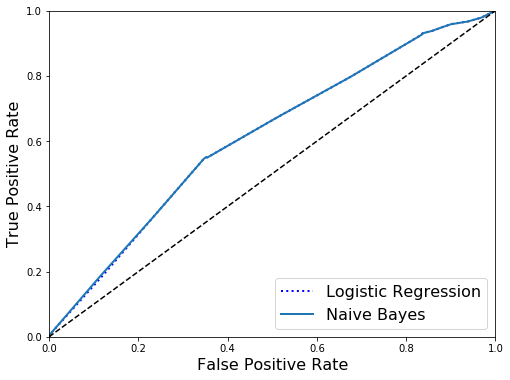

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, "b:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_nb, tpr_nb, "Naive Bayes")
plt.legend(loc="lower right", fontsize=16)
plt.show()

The two models, with their best threshold, are extremely similar in all evaluators using cross-validation on a training set. Both models have fairl low precision, but can do better than random. The Naive Bayes model performs slightly better, with a greater ROC_AUC score and greater Recall which are the two most important factors in identifying customers.

## 4.4 | Run Model on Test Data

In [34]:
#Finally, we see how well the two models perform on the Test Data to see if anything changes from the cross-validation analysis:
model_data_test = np.array([np.array(bank_test['default']), np.array(bank_test['housing']), np.array(bank_test['loan']), 
    np.array(bank_test['response'])]).T

X_test = model_data[:,0:3]
y_test = model_data[:,3]

y_scores_log_test = log_reg.predict_proba(X_test)[:,1]

#Finally we, re-evalute the confusion Matrix and also calculate the Precision, Recall, AUC Score, and F1 Score
#Using the threshold calculated above to get the predicted values for the test set

y_test_pred_best_threshold_log = (y_scores_log_test > best_threshold_log)

log_test_confusionmatrix = confusion_matrix(y_test, y_test_pred_best_threshold_log)
log_test_precision = precision_score(y_test, y_test_pred_best_threshold_log)
log_test_recall = recall_score(y_test, y_test_pred_best_threshold_log)
log_test_f1 = f1_score(y_test, y_test_pred_best_threshold_log) 
log_test_auc = roc_auc_score(y_test, y_test_pred_best_threshold_log )

print('Confusion Matrix :\n', log_test_confusionmatrix)
print('Precision score : ',round(log_test_precision,4))
print('Recall score: ', round(log_test_recall,4))
print('F1 score: ', round(log_test_f1,4))
print('ROC AUC score: ', round(log_test_auc,4))

Confusion Matrix :
 [[2065 1133]
 [ 188  230]]
Precision score :  0.1687
Recall score:  0.5502
F1 score:  0.2583
ROC AUC score:  0.598


In [35]:
y_scores_nb_test = nb_bern.predict_proba(X_test)[:,1]

#Finally we, re-evalute the confusion Matrix and also calculate the Precision, Recall, AUC Score, and F1 Score
#Using the threshold calculated above to get the predicted values for the test set

y_test_pred_best_threshold_nb = (y_scores_nb_test > best_threshold_nb)

nb_test_confusionmatrix = confusion_matrix(y_test, y_test_pred_best_threshold_nb)
nb_test_precision = precision_score(y_test, y_test_pred_best_threshold_nb)
nb_test_recall = recall_score(y_test, y_test_pred_best_threshold_nb)
nb_test_f1 = f1_score(y_test, y_test_pred_best_threshold_nb) 
nb_test_auc = roc_auc_score(y_test, y_test_pred_best_threshold_nb )

print('Confusion Matrix :\n', nb_test_confusionmatrix)
print('Precision score : ',round(nb_test_precision,4))
print('Recall score: ', round(nb_test_recall,4))
print('F1 score: ', round(nb_test_f1,4))
print('ROC AUC score: ', round(nb_test_auc,4))

Confusion Matrix :
 [[2090 1108]
 [ 190  228]]
Precision score :  0.1707
Recall score:  0.5455
F1 score:  0.26
ROC AUC score:  0.5995


Both models perform about as well on the test data as on the training data so the results appear to be valid.

## 4.5 Summary of Customers to Target


Default value counts ---
[[   0 1321]
 [   1   15]]

Housing value counts ---
[[   0 1336]]

Loan value counts ---
[[   0 1336]]


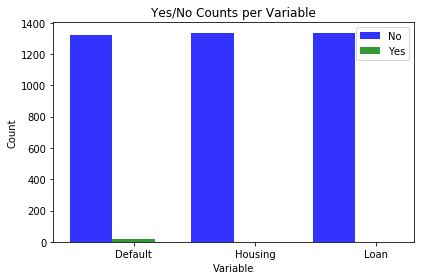

In [37]:
#Using the test data, we graph what the customers look like for our three variables. In the future, the analysis should 
#be expanded to include mroe of teh available data

target_customers = X_test[np.where(y_test_pred_best_threshold_nb==1)]

#Display value counts and plot histograms of the three explanotry variables

#Default
uniquedefault, countsdefault = np.unique(target_customers[:,0], return_counts=True)
print('\nDefault value counts ---')
print (np.asarray((uniquedefault, countsdefault)).T)


#Housing
uniquehousing, countshousing = np.unique(target_customers[:,1], return_counts=True)
print('\nHousing value counts ---')
print (np.asarray((uniquehousing, countshousing)).T)

#Loan
uniqueloan, countsloan = np.unique(target_customers[:,2], return_counts=True)
print('\nLoan value counts ---')
print (np.asarray((uniqueloan, countsloan)).T)

# data to plot - no 1 values for housing and loan
n_groups = 3
counts_no = (countsdefault[0], countshousing[0], countsloan[0])
counts_yes = (countsdefault[1], 0, 0)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, counts_no, bar_width,
alpha=opacity,
color='b',
label='No')
 
rects2 = plt.bar(index + bar_width, counts_yes, bar_width,
alpha=opacity,
color='g',
label='Yes')
 
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Yes/No Counts per Variable')
plt.xticks(index + bar_width, ('Default', 'Housing', 'Loan', 'Response'))
plt.legend()
 
plt.tight_layout()
plt.show()



Default value counts ---
[[   0 2230]
 [   1   50]]

Housing value counts ---
[[   0  235]
 [   1 2045]]

Loan value counts ---
[[   0 1716]
 [   1  564]]


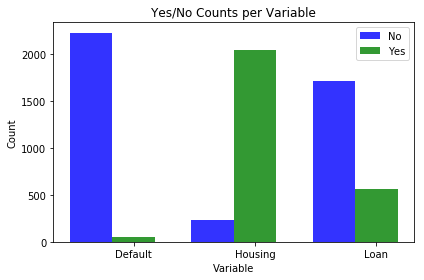

In [38]:
#Using the test data, we graph what the customers look like for our three variables. In the future, the analysis should 
#be expanded to include mroe of teh available data

not_target_customers = X_test[np.where(y_test_pred_best_threshold_nb==0)]

#Display value counts and plot histograms of the three explanotry variables

#Default
uniquedefault, countsdefault = np.unique(not_target_customers[:,0], return_counts=True)
print('\nDefault value counts ---')
print (np.asarray((uniquedefault, countsdefault)).T)
#histdefault = 

#Housing
uniquehousing, countshousing = np.unique(not_target_customers[:,1], return_counts=True)
print('\nHousing value counts ---')
print (np.asarray((uniquehousing, countshousing)).T)

#Loan
uniqueloan, countsloan = np.unique(not_target_customers[:,2], return_counts=True)
print('\nLoan value counts ---')
print (np.asarray((uniqueloan, countsloan)).T)

# data to plot
n_groups = 3
counts_no = (countsdefault[0], countshousing[0], countsloan[0])
counts_yes = (countsdefault[1], countshousing[1], countsloan[1])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, counts_no, bar_width,
alpha=opacity,
color='b',
label='No')
 
rects2 = plt.bar(index + bar_width, counts_yes, bar_width,
alpha=opacity,
color='g',
label='Yes')
 
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Yes/No Counts per Variable')
plt.xticks(index + bar_width, ('Default', 'Housing', 'Loan', 'Response'))
plt.legend()
 
plt.tight_layout()
plt.show()


The biggest difference apepars that customers without a housing and personal loan are more likely to respond yes.